In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

### 실습 과제 1. Boston_house_small 데이터를 활용한 PCA + regression 실습

#### 1) 데이터 불러온 후 train_data : test_data = 7:3 split, random_state=10
** 종속변수는 ‘Target', 독립변수는 나머지 변수

In [2]:
df = pd.read_csv('./data/Boston_house_small.csv')
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,40.3,392.92,5.762,2.81838,4.0983,18.10,10.42,0.532,20.2,24,0.0,666,0,21.8
1,59.7,24.65,5.837,12.24720,1.9976,18.10,15.69,0.584,20.2,24,0.0,666,0,10.2
2,91.7,396.90,6.142,1.23247,3.9769,8.14,18.72,0.538,21.0,4,0.0,307,0,15.2
3,52.6,390.30,7.470,0.54050,2.8720,3.97,3.16,0.575,13.0,5,20.0,264,0,43.5
4,100.0,366.15,6.216,9.23230,1.1691,18.10,9.53,0.631,20.2,24,0.0,666,0,50.0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      60 non-null     float64
 1   B        60 non-null     float64
 2   RM       60 non-null     float64
 3   CRIM     60 non-null     float64
 4   DIS      60 non-null     float64
 5   INDUS    60 non-null     float64
 6   LSTAT    60 non-null     float64
 7   NOX      60 non-null     float64
 8   PTRATIO  60 non-null     float64
 9   RAD      60 non-null     int64  
 10  ZN       60 non-null     float64
 11  TAX      60 non-null     int64  
 12  CHAS     60 non-null     int64  
 13  Target   60 non-null     float64
dtypes: float64(11), int64(3)
memory usage: 6.7 KB


,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,68.041667,354.305333,6.318433,3.102863,3.901313,10.775833,12.076167,0.552950,18.691667,9.950000,9.983333,410.116667,0.033333,22.955000
std,27.135150,91.194366,0.699257,5.540228,2.326631,7.016623,6.163047,0.106549,1.970829,9.018672,23.614303,180.034280,0.181020,10.373098
min,6.500000,10.480000,5.155000,0.014320,1.169100,1.320000,2.470000,0.398000,13.000000,2.000000,0.000000,187.000000,0.000000,7.000000
25%,52.400000,374.197500,5.866500,0.128445,2.260625,5.130000,6.632500,0.462500,17.875000,4.000000,0.000000,276.000000,0.000000,16.225000
50%,71.650000,392.080000,6.177000,0.289365,3.290150,8.140000,12.830000,0.538000,19.150000,5.000000,0.000000,320.500000,0.000000,21.250000
75%,90.950000,396.900000,6.565000,4.094135,4.575800,18.100000,15.715000,0.616500,20.200000,24.000000,0.000000,666.000000,0.000000,24.850000
max,100.000000,396.900000,8.337000,28.655800,12.126500,27.740000,30.810000,0.871000,21.200000,24.000000,100.000000,711.000000,1.000000,50.000000


In [5]:
X = df.drop(columns='Target', axis=1)
Y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

print(f"X_train dataset shape: {X_train.shape}")
print(f"X_test dataset shape: {X_test.shape}")

X_train dataset shape: (42, 13)
X_test dataset shape: (18, 13)


#### 2) PCA 수행해서 주성분(principal component) 개수에 따른 mean squared Error 그래프 그리고, principal component 개수에 따른 PCA의 explained_variance_ratio 구하기
**cross_val_score 함수 이용해서(cv=5) principal component 5개까지 mean squared error 구하기
 

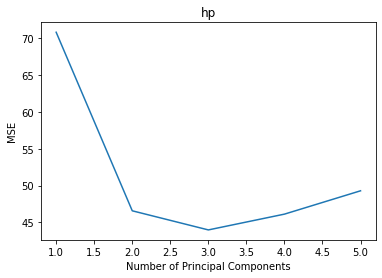

Explained Varicance per principal component: 
[0.4903983  0.10552172 0.08436537 0.07794373 0.06522836 0.05725848
 0.04260774 0.02852523 0.01583058 0.01303964 0.01268944 0.00498424
 0.00160716]


In [11]:
pca = PCA()
X_train_reduced = pca.fit_transform(scale(X_train))
lr = LinearRegression()
mse = []

for i in np.arange(1, 6):
    score = -1 * cross_val_score(lr, X_train_reduced[:,:i], y_train, cv=5, scoring='neg_mean_squared_error').mean()
    mse.append(score)

num_pc = np.arange(1, 6)
plt.plot(num_pc, mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')
plt.show()

print(f"Explained Varicance per principal component: \n{pca.explained_variance_ratio_}")

#### 3) 가장 작은 mean squared error 가지는 주성분 개수로  PCA 수행하고, regression을 하기. 검증 데이터(test data)에 대한 mean squared error 구하고,  모델의 R^2 구하기

In [12]:
pca = PCA(n_components=3)
X_train_reduced = pca.fit_transform(scale(X_train))
X_test_reduced = pca.transform(scale(X_test))

lr = LinearRegression()
lr.fit(X_train_reduced, y_train)
pred = lr.predict(X_test_reduced)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred))}")
print(f"R^2: {r2_score(y_test, pred)}")

RMSE: 6.0355633179031285
R^2: 0.7305351279833863


#### 4)  PCA 없이 regression 하기. 검증 데이터(test data)에 대한 mean squared error 구하고,  모델이 R^2 구한 후 PCA를 수행한 결과와 비교하기

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred))}")
print(f"R^2: {r2_score(y_test, pred)}")

RMSE: 6.839887639217207
R^2: 0.6539295864346182


### 실습 과제 2. Iris 데이터를 활용한 PCA + SVM 실습

#### 1) 데이터 불러온 후 train_data : test_data = 7:3 split, random_state=100
** 종속변수는 ‘Target', 독립변수는 나머지 변수

In [14]:
iris_df = pd.read_csv('./data/Iris.csv')
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
iris_df.info()
iris_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
X = iris_df.drop(columns='Species', axis=1)
Y = iris_df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

print(f"X_train dataset shape: {X_train.shape}")
print(f"X_test dataset shape: {X_test.shape}")

X_train dataset shape: (105, 4)
X_test dataset shape: (45, 4)


#### 2) PCA 수행해서 주성분(principal component) 개수에 따른 accuracy그래프 그리기
**cross_val_score 함수 이용해서(cv=5) principal component 5개까지 accuracy 구하기

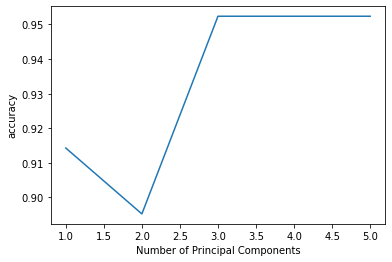

In [31]:
pca = PCA()
X_train_reduced = pca.fit_transform(scale(X_train))
accuracy = []

for i in np.arange(1, 6):
    score = cross_val_score(svm.SVC(), X_train_reduced[:,:i], y_train, cv=5, scoring='accuracy').mean()
    accuracy.append(score)

num_pc = np.arange(1, 6)
plt.plot(num_pc, accuracy)
plt.xlabel('Number of Principal Components')
plt.ylabel('accuracy')
plt.show()

# print(f"Explained Varicance per principal component: \n{pca.explained_variance_ratio_}")

#### 3) 높은 accuracy 가지는 주성분 개수로 PCA 수행하고, 5-fold 교차 검증으로 SVM의 최적 하이퍼파라미터 구하기. 검증 데이터(test data)에 대한 최적 모델의 accuracy와 confusion matrix 구하기
** C: [0.01, 0.1, 0.5, 1, 10, 100], gamma: [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], kernel: ['rbf', 'poly', 'linear']

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100],
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'linear']}

pca = PCA(n_components=3)
X_train_reduced = pca.fit_transform(scale(X_train))
X_test_reduced = pca.transform(scale(X_test))

grid = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train_reduced, y_train)

best_params = grid.best_params_
best_svm = grid.best_estimator_
print(f"Best params: {best_params}")

y_pred = best_svm.predict(X_test_reduced)
con_mat = metrics.confusion_matrix(y_test, y_pred)
acc_svm = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_svm}")
print(f"confusion matrix: \n{con_mat}")

Best params: {'C': 0.5, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.9333333333333333
confusion matrix: 
[[16  0  0]
 [ 0 11  0]
 [ 0  3 15]]


#### 4) PCA 없이 최적 하이퍼파라미터로 SVM 모델 학습하기 , 검증 데이터(test data)에 대한 accuracy와 confusion matrix 구하기

In [33]:
grid = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

best_params = grid.best_params_
best_svm = grid.best_estimator_
print(f"Best params: {best_params}")

y_pred = best_svm.predict(X_test)
con_mat = metrics.confusion_matrix(y_test, y_pred)
acc_svm = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc_svm}")
print(f"confusion matrix: \n{con_mat}")

Best params: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.9777777777777777
confusion matrix: 
[[16  0  0]
 [ 0 10  1]
 [ 0  0 18]]
